In [4]:
#@title nvidia-smi gpu check
!nvidia-smi

Tue Jul 12 06:53:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
#@title Install all dependencies (run only once per session)

!git clone https://github.com/asigalov61/tegridy-tools

!pip install torch
!pip install tqdm

Cloning into 'tegridy-tools'...
remote: Enumerating objects: 2502, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 2502 (delta 33), reused 0 (delta 0), pack-reused 2446
Receiving objects: 100% (2502/2502), 117.37 MiB | 47.09 MiB/s, done.
Resolving deltas: 100% (1621/1621), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#@title Import all needed modules

print('Loading needed modules. Please wait...')
import os
from datetime import datetime
import secrets

import tqdm
from tqdm import auto

if not os.path.exists('/content/Dataset'):
    os.makedirs('/content/Dataset')

print('Loading TMIDIX module...')
os.chdir('/content/tegridy-tools/tegridy-tools')
import TMIDIX

os.chdir('/content/tegridy-tools/tegridy-tools')
from minGPT import *

from IPython.display import display, Javascript, HTML, Audio

from google.colab import output, drive

os.chdir('/content/')
print('Loading complete. Enjoy! :)')

Loading needed modules. Please wait...
Loading TMIDIX module...
Loading minGPT modules...
Available Processing Device is: cuda:0
Done!
Loading complete. Enjoy! :)


In [7]:
#@title Download latest best pre-trained model checkpoint and TXT dataset

#@markdown NOTE: You can go straight to the setup/load sections and then to music generation

#@markdown NOTE: You do not need to change any settings to run this model. Just use the colab defaults to run it.
%cd /content/

print('=' * 70)
print('Downloading pre-trained dataset-model...Please wait...')
print('=' * 70)

!wget https://github.com/asigalov61/Optimus-VIRTUOSO/raw/main/Dataset-Model/MuseNet/Optimus-VIRTUOSO-Dataset-Model.zip.001
!wget https://github.com/asigalov61/Optimus-VIRTUOSO/raw/main/Dataset-Model/MuseNet/Optimus-VIRTUOSO-Dataset-Model.zip.002
!wget https://github.com/asigalov61/Optimus-VIRTUOSO/raw/main/Dataset-Model/MuseNet/Optimus-VIRTUOSO-Dataset-Model.zip.003

!cat Optimus-VIRTUOSO-Dataset-Model.zip* > Optimus-VIRTUOSO-Dataset-Model.zip
print('=' * 70)

!unzip -j Optimus-VIRTUOSO-Dataset-Model.zip
print('=' * 70)

print('Done! Enjoy! :)')
print('=' * 70)
%cd /content/

/content
--2022-07-12 06:58:08--  https://github.com/asigalov61/Optimus-VIRTUOSO/raw/main/Dataset-Model/MuseNet/Optimus-VIRTUOSO-Dataset-Model.zip.001
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/asigalov61/Optimus-VIRTUOSO/main/Dataset-Model/MuseNet/Optimus-VIRTUOSO-Dataset-Model.zip.001 [following]
--2022-07-12 06:58:08--  https://raw.githubusercontent.com/asigalov61/Optimus-VIRTUOSO/main/Dataset-Model/MuseNet/Optimus-VIRTUOSO-Dataset-Model.zip.001
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26214400 (25M) [application/octet-stream]
Saving to: ‘Optimus-VIRTUOSO-Dataset-Model.zip.001’

O

In [8]:
#@title Create/prepare GPT2 model and load the dataset

full_path_to_training_text_file = "/content/Optimus-VIRTUOSO-Music-Dataset.txt" #@param {type:"string"}
model_attention_span_in_tokens = 512 #@param {type:"slider", min:0, max:1024, step:16}
model_embed_size = 512 #@param {type:"slider", min:0, max:1024, step:16}
number_of_heads = 8 #@param {type:"slider", min:1, max:16, step:1}
number_of_layers = 6 #@param {type:"slider", min:1, max:16, step:1}
number_of_training_epochs = 1 #@param {type:"slider", min:1, max:5, step:1}
training_batch_size = 48 #@param {type:"slider", min:4, max:256, step:4}
number_of_dataloader_threads = 2 #@param {type:"slider", min:1, max:64, step:1}
model_learning_rate = 6e-4 #@param {type:"number"}
checkpoint_full_path = "" #@param {type:"string"}

if checkpoint_full_path == '':
  checkpoint_full_path = None


trainer, model, train_dataset = MainLoader(full_path_to_training_text_file,
                                          None,
                                          number_of_dataloader_threads,
                                          model_attention_span_in_tokens,
                                          model_embed_size,
                                          number_of_heads,
                                          number_of_layers,
                                          number_of_training_epochs,
                                          training_batch_size,
                                          model_learning_rate,
                                          ckpt_path=checkpoint_full_path)

Dataset has 898055 characters, 571 unique.


07/12/2022 06:58:13 - INFO - minGPT - number of parameters: 1.976218e+07


Checkpoint = None


In [11]:
#@title Train the model
%cd /content/
trainer.train()

/content


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/18699 [00:00<?, ?it/s]

RuntimeError: ignored

In [12]:
#@title Plot Positional Embeddings

# visualize some of the learned positional embeddings, maybe they contain structure
PlotPositionalEmbeddings(model, model_attention_span_in_tokens)

In [13]:
#@title Save/Resave the model from memory

#@markdown Standard PyTorch AI models file extension is PTH

#@markdown NOTE: This code/cell will save 2 (TWO) files: model checkpoint (.pth) and model checkpoint with state dict (.pth.checkpoint) to resume training

full_path_to_save_model_to = "/content/Optimus-VIRTUOSO-Trained-Model.pth" #@param {type:"string"}

%cd /content/

torch.save(model, full_path_to_save_model_to)
torch.save(model.state_dict(), full_path_to_save_model_to + '.checkpoint')

/content


In [14]:
#@title Load/Reload existing model/checkpoint

#@markdown NOTE on models' extensions:

#@markdown .pth == model checkpoint only

#@markdown .pth.checkpoint == model checkpoint with state dict to restore training

full_path_to_model_checkpoint = "/content/Optimus-VIRTUOSO-Trained-Model.pth" #@param {type:"string"}
model = torch.load(full_path_to_model_checkpoint)
model.eval()

GPT(
  (tok_emb): Embedding(571, 512)
  (drop): Dropout(p=0.1, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (ln1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (ln2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (key): Linear(in_features=512, out_features=512, bias=True)
        (query): Linear(in_features=512, out_features=512, bias=True)
        (value): Linear(in_features=512, out_features=512, bias=True)
        (attn_drop): Dropout(p=0.1, inplace=False)
        (resid_drop): Dropout(p=0.1, inplace=False)
        (proj): Linear(in_features=512, out_features=512, bias=True)
      )
      (mlp): Sequential(
        (0): Linear(in_features=512, out_features=2048, bias=True)
        (1): GELU()
        (2): Linear(in_features=2048, out_features=512, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
    )
    (1): Block(
      (ln1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      

In [15]:
#@title Generate and download the composition as TXT file.
#@markdown PLEASE NOTE IMPORTANT POINTS: 

#@markdown 0) If you are not sure where to start/what settings to set, please use original defaults.

#@markdown 1) Model primes from the dataset !!!

#@markdown 2) Model's first output may be empty or garbled so please try several times before discarting the model

#@markdown 3) You can now communicate to the model desired length of the output composition by suffixing input_prompt with number of notes.

#@markdown I.e. SONG=Relax_with_900_notes

#@markdown 4) Self-continuation option overrides the SONG input prompt. Self-continuation is by random 300 tokens (~100 notes) from the dataset

print('Optimus VIRTUOSO Model Generator')
print('Starting up...')
number_of_tokens_to_generate = 8192 #@param {type:"slider", min:0, max:32768, step:128}
creativity_temperature = 1 #@param {type:"slider", min:0.05, max:4, step:0.05}
top_k_prob = 64 #@param {type:"slider", min:0, max:128, step:1}
input_prompt = "SONG=" #@param {type:"string"}
self_continuation = False #@param {type:"boolean"}

os.chdir('/content/')

if self_continuation:
    with open(full_path_to_training_text_file) as f:
      dataset = f.read()

    idx = secrets.randbelow(len(dataset))
    input_prompt = 'SONG=Self-Continuation' + chr(10)
    input_prompt += dataset[idx:idx+300]

completion = Generate(model,
                      train_dataset,
                      trainer,
                      number_of_tokens_to_generate,
                      creativity_temperature,
                      top_k_prob,
                      input_prompt)

# Stuff for datetime stamp
filename = '/content/Optimus-VIRTUOSO-Composition-' + 'generated-on-' 
fname = TMIDIX.Tegridy_File_Time_Stamp(filename)

print('Done!')
print('Saving to', str(fname + '.txt'))
with open(fname + '.txt', "w") as text_file:
    print(completion, file=text_file)

print('Downloading TXT file...')
from google.colab import files
files.download(fname + '.txt')

Optimus VIRTUOSO Model Generator
Starting up...


  0%|          | 0/8192 [00:00<?, ?it/s]

Time-stamping output file...
Done!
Saving to /content/Optimus-VIRTUOSO-Composition-generated-on-2022-07-12_08_13_51_787586.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
#@title Convert to MIDI from TXT (w/Tegridy MIDI-TXT Processor)

#@markdown Please note that only the first generated composition is being converted to MIDI by default. Please check the output TXT file for extra generated compositions.
number_of_ticks_per_quarter = 500 #@param {type:"slider", min:50, max:1000, step:50}
dataset_time_denominator = 1 #@param {type:"slider", min:1, max:20, step:1}
melody_conditioned_encoding = False
encoding_has_MIDI_channels = False #@param {type:"boolean"}
encoding_has_velocities = False #@param {type:"boolean"}
simulate_velocity = True #@param {type:"boolean"}
save_only_first_composition = False #@param {type:"boolean"}
chars_encoding_offset_used_for_dataset = 33 #@param {type:"number"}

print('Converting TXT to MIDI. Please wait...')

'''For debug:'''
# fname = '/content/Optimus-VIRTUOSO-Music-Dataset'

with open(fname + '.txt', 'r') as f:
  completion = f.read()

output_list, song_name = TMIDIX.Optimus_TXT_to_Notes_Converter(completion, 
                                                                has_MIDI_channels=encoding_has_MIDI_channels, 
                                                                simulate_velocity=simulate_velocity,
                                                                char_encoding_offset=chars_encoding_offset_used_for_dataset,
                                                                save_only_first_composition=save_only_first_composition,
                                                                dataset_MIDI_events_time_denominator=dataset_time_denominator,
                                                                has_velocities=encoding_has_velocities
                                                                )

print('Converting Song to MIDI...')

output_signature = 'Optimus VIRTUOSO'

detailed_stats = TMIDIX.Tegridy_SONG_to_MIDI_Converter(output_list,
                                                      output_signature = output_signature,  
                                                      output_file_name = fname, 
                                                      track_name=song_name, 
                                                      number_of_ticks_per_quarter=number_of_ticks_per_quarter)

print('Done!')

print('Downloading your composition now...')
from google.colab import files
files.download(fname + '.mid')

print('Detailed MIDI stats:')
detailed_stats

Converting TXT to MIDI. Please wait...
Tegridy Optimus TXT to Notes Converter
Converting TXT to Notes list...Please wait...
Bad note string: 
Task complete! Enjoy! :)
Converting Song to MIDI...
Converting to MIDI. Please stand-by...
Done! Enjoy! :)
Done!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Detailed MIDI stats:


{'bank_select': [],
 'channels_by_track': [set(), {0}],
 'channels_total': {0},
 'general_midi_mode': [],
 'nticks': 114140,
 'ntracks': 2,
 'num_notes_by_channel': {0: 2042},
 'patch_changes_by_track': [{},
  {0: 0,
   1: 24,
   2: 32,
   3: 40,
   4: 42,
   5: 46,
   6: 56,
   7: 71,
   8: 73,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0}],
 'patch_changes_total': {0, 24, 32, 40, 42, 46, 56, 71, 73},
 'percussion': {},
 'pitch_range_by_track': [(0, 0), (20, 99)],
 'pitch_range_sum': 79,
 'pitches': {20: 1,
  26: 1,
  29: 6,
  30: 1,
  32: 2,
  33: 4,
  34: 6,
  36: 1,
  37: 1,
  38: 7,
  39: 16,
  40: 1,
  41: 55,
  42: 4,
  43: 2,
  44: 15,
  45: 8,
  46: 35,
  47: 1,
  48: 15,
  49: 28,
  50: 12,
  51: 24,
  52: 5,
  53: 60,
  54: 5,
  55: 28,
  56: 29,
  57: 8,
  58: 57,
  60: 74,
  61: 55,
  62: 62,
  63: 72,
  64: 9,
  65: 188,
  66: 10,
  67: 97,
  68: 142,
  69: 118,
  70: 175,
  71: 10,
  72: 131,
  73: 63,
  74: 63,
  75: 77,
  76: 5,
  77: 79,
  78: 9

In [17]:
#@title Install prerequisites
!apt install fluidsynth #Pip does not work for some reason. Only apt works
!pip install midi2audio
!pip install pretty_midi

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 62 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ub

Synthesizing the last output MIDI... 
Plotting the composition. Please wait...


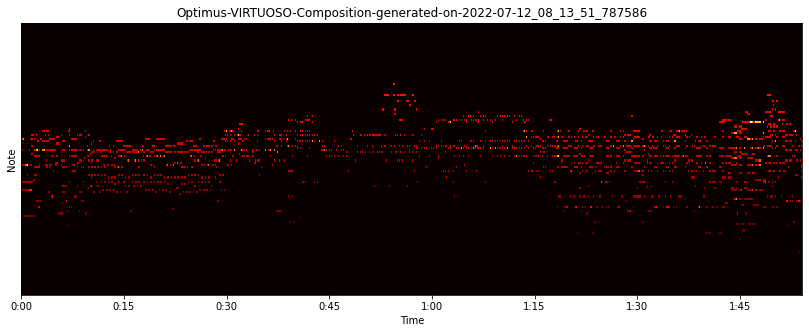

In [18]:
#@title Plot and listen to the last generated composition
#@markdown NOTE: May be very slow with the long compositions
from midi2audio import FluidSynth
from IPython.display import display, Javascript, HTML, Audio
import pretty_midi
import librosa.display
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

print('Synthesizing the last output MIDI... ')
# fname = '/content/Endless-Piano-Music-Composition'

fn = os.path.basename(fname + '.mid')
fn1 = fn.split('.')[0]

print('Plotting the composition. Please wait...')

pm = pretty_midi.PrettyMIDI(fname + '.mid')

# Retrieve piano roll of the MIDI file
piano_roll = pm.get_piano_roll()


plt.figure(figsize=(14, 5))
librosa.display.specshow(piano_roll, x_axis='time', y_axis='cqt_note', fmin=1, hop_length=160, sr=16000, cmap=plt.cm.hot)
plt.title(fn1)

FluidSynth("/usr/share/sounds/sf2/FluidR3_GM.sf2", 16000).midi_to_audio(str(fname + '.mid'), str(fname + '.wav'))
Audio(str(fname + '.wav'), rate=16000)